In [1]:
import sys
sys.path.append('..')

In [2]:
import xgboost as xgb
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from core.dataset import *
from core.utils import *

In [3]:
load_dir = 'D:/Data/hoffmanlab/featureselection/data/'
ligands = ['CpG', 'FLA', 'FSL', 'LPS', 'P3K', 'PIC', 'R84', 'TNF']
sheet_type = 'am'

In [4]:
data = Data(load_dir, ligands, sheet_type, merge=True, numpy=False)

In [5]:
feature_importance = pd.read_csv('C:/Users/minha/Research/hoffmanlab/featuresel/data/untuned_model_feature_importance.csv')

### Loop through 1-20 features to find the threshold (Random State 1)

In [6]:
# parameters
epochs = 15
feature_list = ['integrals_pos_38', 'min_trough2peak', 'integrals_pos_11', 'integrals_40', 'integrals_pos_14', 
                'time_series_2', 'integrals_pos_12', 'envelope_2', 'envelope_2', 'integrals_10', 'envelope_3', 'integrals_pos_37',
                'oscpower', 'integrals_pos_45', 'fold_change_21', 'fold_change_20']
dataset = data # already initialized
target_names = ligands
n = len(feature_list)

In [7]:
crs = []
static_percent_res = []
seq_percent_res = []

for e in range(epochs):
    dat = feature_list[:(n-e)] # discard last entry of the feature list per epoch
    print(f'\nNumber of features: {n - e}')
    cr = one_fit(dat, dataset, target_names, random_state=100, verbose=True, ret=True)
    
    if e != 0: 
        static_residual = cr.iloc[8, 2] / crs[0].iloc[8, 2]
        percent_residual = cr.iloc[8, 2] / crs[-1].iloc[8, 2] # where iloc[8, 2] is the weighted avg f1-score
        
        print(f'Static Percentange Residual {static_residual}')
        print(f'Sequential Percentage Residual: {percent_residual}')
        
        static_percent_res.append(static_residual)
        seq_percent_res.append(percent_residual)
        
    crs.append(cr)


Number of features: 16
[23:30:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score      support
CpG            0.435185  0.433180  0.434180   217.000000
FLA            0.373016  0.293750  0.328671   160.000000
FSL            0.364130  0.403614  0.382857   166.000000
LPS            0.523077  0.563536  0.542553   181.000000
P3K            0.336364  0.284615  0.308333   130.000000
PIC            0.638158  0.718519  0.675958   135.000000
R84            0.802083  0.827957  0.814815   279.000000
TNF            0.556886  0.547059  0.551929   170.000000
accuracy       0.534075  0.534075  0.534075     0.534075
macro avg      0.503612  0.509029  0.504912  1438.000000
weighted avg   0.526823  0.534075  0.5

## Vector of 6 features meets the 50% threshold
* < 6 features metrics begin to rapidly decline

## Visualizations

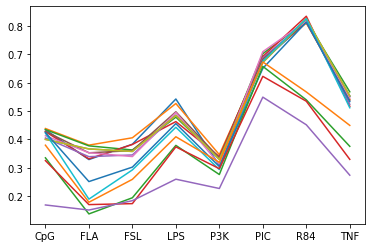

In [8]:
# f1-scores follow nearly identical trend across all ligands
# lines begin to diverge < on model classification reports trained on < 6 features
for i in crs:
    plt.plot(i.iloc[:8, 2])

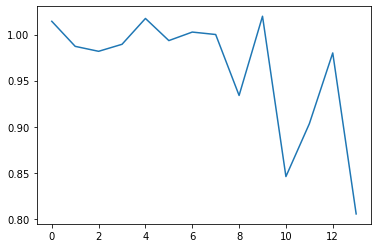

In [9]:
plt.plot(seq_percent_res)

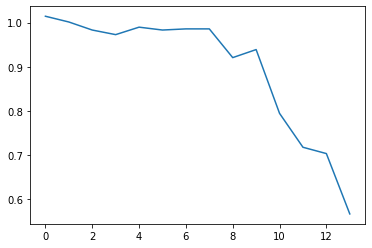

In [10]:
plt.plot(static_percent_res)

## Random State 2

In [16]:
crs2 = []
static_percent_res2 = []
seq_percent_res2 = []

for e in range(epochs):
    dat = feature_list[:(n-e)] # discard last entry of the feature list per epoch
    print(f'\nNumber of features: {n - e}')
    cr = one_fit(dat, dataset, target_names, random_state=10, verbose=True, ret=True)
    
    if e != 0: 
        static_residual = cr.iloc[8, 2] / crs[0].iloc[8, 2]
        percent_residual = cr.iloc[8, 2] / crs[-1].iloc[8, 2] # where iloc[8, 2] is the weighted avg f1-score
        
        print(f'Static Percentange Residual {static_residual}')
        print(f'Sequential Percentage Residual: {percent_residual}')
        
        static_percent_res2.append(static_residual)
        seq_percent_res2.append(percent_residual)
        
    crs2.append(cr)


Number of features: 16
[23:35:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score      support
CpG            0.378995  0.408867  0.393365   203.000000
FLA            0.297710  0.286765  0.292135   136.000000
FSL            0.464646  0.438095  0.450980   210.000000
LPS            0.450495  0.497268  0.472727   183.000000
P3K            0.486486  0.391304  0.433735   138.000000
PIC            0.705036  0.666667  0.685315   147.000000
R84            0.807692  0.817121  0.812379   257.000000
TNF            0.494382  0.536585  0.514620   164.000000
accuracy       0.525035  0.525035  0.525035     0.525035
macro avg      0.510680  0.505334  0.506907  1438.000000
weighted avg   0.526337  0.525035  0.5

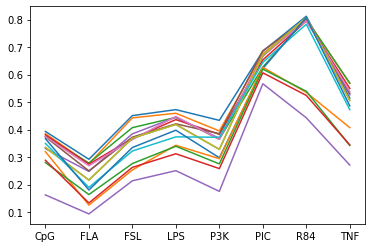

In [17]:
for i in crs2:
    plt.plot(i.iloc[:8, 2])

plt.plot(seq_percent_res2)

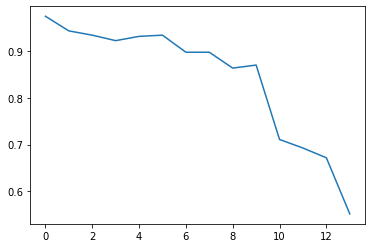

In [19]:
plt.plot(static_percent_res2)

## Random State 3

In [21]:
crs3 = []
static_percent_res3 = []
seq_percent_res3 = []

for e in range(epochs):
    dat = feature_list[:(n-e)] # discard last entry of the feature list per epoch
    print(f'\nNumber of features: {n - e}')
    cr = one_fit(dat, dataset, target_names, random_state=290, verbose=True, ret=True)
    
    if e != 0: 
        static_residual = cr.iloc[8, 2] / crs[0].iloc[8, 2]
        percent_residual = cr.iloc[8, 2] / crs[-1].iloc[8, 2] # where iloc[8, 2] is the weighted avg f1-score
        
        print(f'Static Percentange Residual {static_residual}')
        print(f'Sequential Percentage Residual: {percent_residual}')
        
        static_percent_res3.append(static_residual)
        seq_percent_res3.append(percent_residual)
        
    crs3.append(cr)


Number of features: 16
[23:37:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score      support
CpG            0.425926  0.446602  0.436019   206.000000
FLA            0.342857  0.326531  0.334495   147.000000
FSL            0.446237  0.386047  0.413965   215.000000
LPS            0.431472  0.505952  0.465753   168.000000
P3K            0.454545  0.382166  0.415225   157.000000
PIC            0.645390  0.739837  0.689394   123.000000
R84            0.788462  0.813492  0.800781   252.000000
TNF            0.542169  0.529412  0.535714   170.000000
accuracy       0.524339  0.524339  0.524339     0.524339
macro avg      0.509632  0.516255  0.511418  1438.000000
weighted avg   0.520290  0.524339  0.5

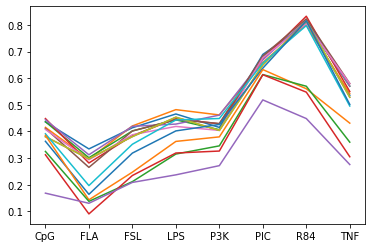

In [22]:
for i in crs3:
    plt.plot(i.iloc[:8, 2])

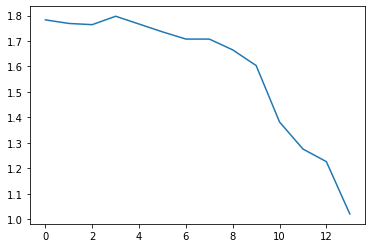

In [23]:
plt.plot(seq_percent_res3)

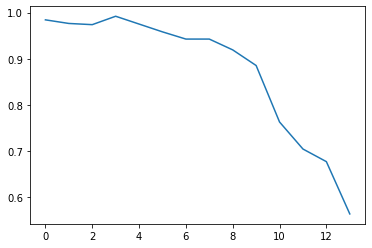

In [24]:
plt.plot(static_percent_res3)

### Next steps:
* find most optimal set of 6 features?
* 5 fold cross validation for finding feature # threshold using different random states